<a href="https://colab.research.google.com/github/juanbarredo/PARLER/blob/main/CAP4910_Copy_of_load_parler_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAP4910
Final Project
Juan Barrero, Rhanses Marquez

Here I will work out the Word Cloud

https://www.youtube.com/watch?v=ZEszws8A45Y&list=PLDQrYJXgF03DpBLHmXZFct9dGRCv0h8Cl&index=1&t=324s

https://github.com/sbooeshaghi/parlertrick

https://ddosecrets.com/wiki/Parler

https://web.archive.org/web/2021*/parler.com

https://fsi.stanford.edu/news/sio-parler-contours


*   "Parler’s moderation policies indicated that they primarily moderate based on user reports, rather than proactive mechanisms. Based on the user profile data, it appears that as of Jan. 9 there were 802 moderators for an estimated 13 million users."
*   "Several distinct account creation peaks on Parler attracted users from Brazil and Saudi Arabia, plus Qanon accounts in Japanese, largely in response to increased content labeling and removal on Twitter."






Research Question:



1.   Can we use this data set to help predict future uprisings?
2.   Does regression model approach help to predict future uprisings?



In [ ]:
!git clone https://github.com/sbooeshaghi/parlertrick.git

Cloning into 'parlertrick'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 3), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [ ]:
!gunzip parlertrick/data/all_posts.csv.gz

In [ ]:
import pandas as pd
from textblob import TextBlob
import re

In [ ]:
tweets = pd.read_csv('parlertrick/data/all_posts.csv')
tweets

,author_name,author_username,author_profile_photo,post_text,post_image,post_timestamp,post_impressions
0,Andy Ngo,@AndyNgo,https://images.parler.com/777e039d6a5341388549...,Philadelphia Police charged 7 in relation to a...,https://api.parler.com/l/GJCyQ,5 days ago,132117.0
1,Bill Kays,@rebootbill,https://images.parler.com/706f1c9d8b454b5f8108...,NaN,NaN,4 days ago,13.0
2,Flint Bedrock,@flintbedrock,https://images.parler.com/1f45e69f8ed145f9b7b0...,Patriots in DC are ready for tomorrow.,NaN,5 days ago,248971.0
3,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,Let’s follow each other!,https://api.parler.com/l/jB7Lz,5 days ago,9829.0
4,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,NaN,../../api.parler.com/l/6Ac5M.html,5 days ago,15689.0
...,...,...,...,...,...,...,...
336475,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,She claims a #blm member hit her in the face a...,NaN,5 days ago,8694.0
336476,Vmilner,@Vmilner,../../images.parler.com/3f88420057b14dc3883b86...,NaN,NaN,5 days ago,44.0
336477,Diamond And Silk,@DiamondAndSilk,https://images.parler.com/66c3bf6a396b40509767...,BIG NEWS IN PENNSYLVANIA!,https://api.parler.com/l/USgUy,5 days ago,1468761.0
336478,Trump News🇺🇸,@TrumpNewsNow,../../images.parler.com/c3ba17bb35d447f79f151d...,We have had ENOUGH❗️We love our country ❤️We l...,../../api.parler.com/l/noQYu.html,5 days ago,23165.0


In [ ]:
tweets = tweets.drop(columns=['author_name', 'author_username', 'author_profile_photo', 'post_image', 'post_impressions','post_timestamp'])
tweets = tweets.dropna()

 


* textblob does emotion analysis behind the text content as a whole or as a part.


*   Polarity defines the phase of emotions expressed in the analyzed sentence. It ranges from -1 to 1




In [ ]:
tweets['Polarity_sentiment_Score']= tweets['post_text'].apply(lambda X: str(TextBlob('u'+str(X)).sentiment.polarity))
pd.set_option('display.max_colwidth',-1)
tweets['Polarity_sentiment_Score'] = tweets['Polarity_sentiment_Score'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
def transform_sentiment(x):
    if x > 0.5: #positive
        return 0
    elif x < - 0.5 : #negative
        return 1
    else:
        return 2 #neutral

tweets['Sentiment_new'] = tweets['Polarity_sentiment_Score'].apply(lambda x: transform_sentiment(x))

count = tweets.groupby(['Sentiment_new']).count()
print(count)


               post_text  Polarity_sentiment_Score
Sentiment_new                                     
0              10448      10448                   
1              6340       6340                    
2              249764     249764                  


In [ ]:
tweets[['post_text','Polarity_sentiment_Score','Sentiment_new']].head(20)

,post_text,Polarity_sentiment_Score,Sentiment_new
0,Philadelphia Police charged 7 in relation to an #antifa riot on New Years Eve where black bloc militants smashed up federal buildings. They were also carrying a firebomb.Adam McVickerMeredith TookerDustin CallahanSydney MillerAllision DonohueJacob RobotinJosey Augustine,-0.015152,2
2,Patriots in DC are ready for tomorrow.,0.200000,2
3,Let’s follow each other!,-0.156250,2
5,Round and round we go.,-0.200000,2
6,His name was Seth Rich..,0.375000,2
7,#anime #animeright #animegirls #waifu #animeart #schediaphiliamore loveliness from Yin! loving the smol boobies and great thighs!,0.800000,0
8,"We Are Pretty Close To It NowA ""Liberal Paradise"" would be a place where everybody has guaranteed employment, free comprehensive healthcare, free education, free food, free housing, free clothing, free utilities, and only Law Enforcement has guns.And believe it or not, such a place does indeed exist . . . it's called prison.Two counts of attempted murder is how I know. Long story but both hit me first.",0.259091,2
9,NEWS:California's 55 electoral votes for Biden suddenly targeted in brand-new actionDecertification demanded amid 700 affidavits of 'irregularities and fraud':,0.000000,2
10,EXPLOSIVE: OBAMA AND RENZI FORMER PM OF ITALY ORCHESTRATED THE THEFT OF U.S. ELECTIONS,0.000000,2
11,"WATCH: Rockstar Utah Patriots Also Confronted Mitt Romney at the Airport, Before Chanting 'Traitor' on His Flight",0.000000,2


Logistic Regression (naive baye)

we have chosen naive bayes to find the optimal decision boundary that best separates the classes.

In [ ]:
#naive bayes
import numpy as np
import joblib
import pickle
from sklearn import  model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import  Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
X= tweets['post_text']
y = tweets['Sentiment_new']

In [ ]:
#vectorizer -->Convert a collection of text documents to a matrix of token counts
bow_transformer = CountVectorizer()
print(tweets['post_text'].shape)
X = bow_transformer.fit_transform(tweets['post_text'])

#tfid transform
tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape) #shape of sparse matrix


(266552,)
(266552, 62421)


In [ ]:
#density to obtain the number of nonzero elements in a matrix
density = (100.0 * X.nnz / (X.shape[0]* X.shape[1]))
print('Density : {}'.format((density)))

Density : 0.03443319311400601


In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2)

In [ ]:
#classifier data
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(classification_report(y_test,preds))

print('overall: {}'.format (accuracy_score(y_test,preds)))

#https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

              precision    recall  f1-score   support

           0       0.72      0.19      0.30      2093
           1       0.84      0.29      0.43      1233
           2       0.95      1.00      0.97     49985

    accuracy                           0.95     53311
   macro avg       0.84      0.49      0.57     53311
weighted avg       0.94      0.95      0.93     53311

overall: 0.9475717956894449


The hypothesis if regression model accuracy helps to predict future uprising is supported by the relationship between the variables. However, 
the result shows an imbalanced accuracy within the classes positive, negative, and neutral. In short, we recommend two different new approach, 

resampling the dataset (The article “8 tactics to combat imbalanced classes in your machine learning dataset”)

or run a new unsupervised model treating sentiment scores as unlabeled (learned in machine learning II)


https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/ 


Topic Selection

In [ ]:
from gensim.parsing.preprocessing import preprocess_string
tweets = tweets.post_text.apply(preprocess_string).tolist()

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(tweets)
corpus = [dictionary.doc2bow(text) for text in tweets]

In [ ]:
#  minutes to run
NUM_TOPICS = 8
ldamodel = LdaModel(corpus,num_topics = NUM_TOPICS, id2word=dictionary, passes=4)

In [ ]:
#heavy word coeffitients
ldamodel.print_topics(num_words=6)

[(0,
  '0.020*"perdu" + 0.019*"vote" + 0.018*"let’" + 0.017*"thousand" + 0.017*"follow" + 0.011*"lead"'),
 (1,
  '0.025*"patriot" + 0.023*"trump" + 0.012*"peopl" + 0.009*"court" + 0.009*"presid" + 0.008*"echo"'),
 (2,
  '0.030*"trump" + 0.021*"support" + 0.016*"polic" + 0.013*"got" + 0.012*"counti" + 0.012*"antifa"'),
 (3,
  '0.035*"echo" + 0.026*"follow" + 0.012*"thank" + 0.011*"agre" + 0.010*"trump" + 0.009*"love"'),
 (4,
  '0.020*"vote" + 0.015*"elect" + 0.014*"georgia" + 0.011*"trump" + 0.010*"new" + 0.010*"fraud"'),
 (5,
  '0.012*"kamala" + 0.012*"look" + 0.012*"king" + 0.012*"harri" + 0.010*"plagiar" + 0.010*"turn"'),
 (6,
  '0.043*"trump" + 0.019*"presid" + 0.017*"stopthest" + 0.017*"biden" + 0.016*"republican" + 0.015*"maga"'),
 (7,
  '0.030*"vote" + 0.024*"senat" + 0.023*"state" + 0.023*"elect" + 0.020*"democrat" + 0.015*"republican"')]

In order to decide the correct number of topics, we will need a way to assess how well the model's topics were chosen

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, 
                                     texts=documents, 
                                     dictionary=dictionary, 
                                     coherence='c_v')
    return coherence_model.get_coherence()

def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        ldamodel = LdaModel(corpus, 
                    num_topics = num_topics, 
                    id2word=dictionary, passes=2)
        coherence = calculate_coherence_score(tweets, 
                                              dictionary, 
                                              ldamodel)
        yield coherence

In [ ]:
###  16 minutes to run
min_topics, max_topics = 1,8
coherence_scores = list(get_coherence_values(min_topics, max_topics))


Calculating coherence for 1 topics

Calculating coherence for 2 topics

Calculating coherence for 3 topics

Calculating coherence for 4 topics

Calculating coherence for 5 topics

Calculating coherence for 6 topics

Calculating coherence for 7 topics


Plot the coherence scores

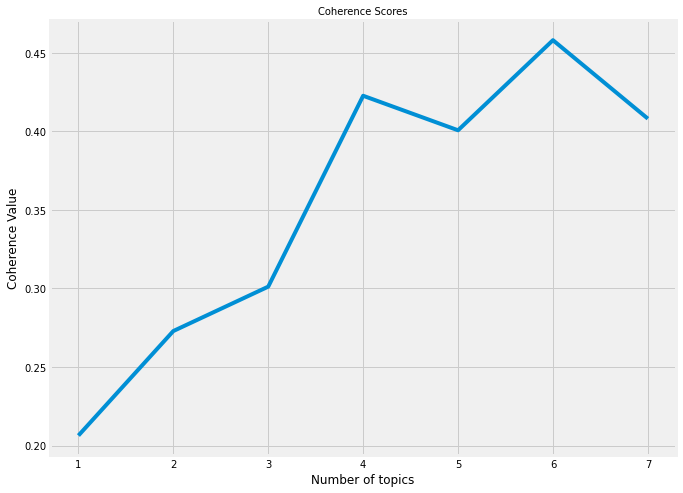

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import MaxNLocator

style.use('fivethirtyeight')

%matplotlib inline

x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(10,8))
plt.xticks(x)
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores', fontsize=10);

In [ ]:
coherence_scores

[0.20635294806398746,
 0.27288674332906654,
 0.30114836567634484,
 0.4226772543812957,
 0.4007038324200889,
 0.45806260926723513,
 0.408092328384281]

LADVis

In [ ]:
import spacy
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import pandas as pd

In [ ]:
tweets = pd.read_csv('parlertrick/data/all_posts.csv', delimiter='\t', header=0, names=['text'])
HANDLE = '@\w+'
LINK = 'https?://t\.co/\w+'
SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'
def clean(text):
    text = re.sub(HANDLE, ' ', text)
    text = re.sub(LINK, ' ', text)
    text = re.sub(SPECIAL_CHARS, ' ', text)
    return text

tweets['text'] = tweets.text.apply(clean)
data=tweets['text']


In [ ]:
# 18 minutes to run
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print (lemmatized_texts[0][0:20])

charge relation anti


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['charge', 'relation', 'antifa', 'riot', 'where', 'black', 'bloc', 'militant', 'smash', 'federal', 'building', 'also', 'carry', 'firebomb', 'day', 'ago']


In [ ]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
ago


In [ ]:
# 32 minutes
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
#!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import warnings

warnings.filterwarnings('ignore')

In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=8)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.480298  0.095075       1        1  20.030889
2      0.283929  0.375933       2        1  15.153658
5      0.445166 -0.134364       3        1  14.061662
6      0.182273  0.029243       4        1  13.053023
1     -0.254670 -0.365411       5        1  11.660113
3     -0.135444  0.444146       6        1   9.161400
4      0.148193 -0.433508       7        1   8.875600
0     -0.189148 -0.011114       8        1   8.003656, topic_info=         Term           Freq          Total Category  logprob  loglift
8         day  297502.000000  297502.000000  Default   8.0000   8.0000
0         ago  162586.000000  162586.000000  Default   7.0000   7.0000
71     parler   44836.000000   44836.000000  Default   6.0000   6.0000
46        com   42918.000000   42918.000000  Default   5.0000   5.0000
65     images   34212.000000   34212.000000  Default   4.0000   4.0000
...       ...            ...            ...      ...      ...      ...
1609    thank    4565.290897    4566.163313   Topic8  -4.1790   2.5251
746      hear    4462.559677    4463.431997   Topic8  -4.2018   2.5251
127   protect    4269.404894    4270.277338   Topic8  -4.2460   2.5251
143      will   13574.963190   45325.205765   Topic8  -3.0893   1.3196
67       know    5182.487562   11092.723323   Topic8  -4.0522   1.7643

[98 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
616       1  0.999854   again
0         1  0.999993     ago
150       5  0.999734   allow
694       6  0.999821     api
337       1  0.999725  arrest
...     ...       ...     ...
143       5  0.078543    will
143       8  0.299502    will
557       3  0.999856     win
252       7  0.999899    work
78        3  0.999872   would

[115 rows x 3 columns], R=8, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 6, 7, 2, 4, 5, 1])

Juan

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('parlertrick/data/all_posts.csv')

In [ ]:
df

,author_name,author_username,author_profile_photo,post_text,post_image,post_timestamp,post_impressions
0,Andy Ngo,@AndyNgo,https://images.parler.com/777e039d6a5341388549...,Philadelphia Police charged 7 in relation to a...,https://api.parler.com/l/GJCyQ,5 days ago,132117.0
1,Bill Kays,@rebootbill,https://images.parler.com/706f1c9d8b454b5f8108...,NaN,NaN,4 days ago,13.0
2,Flint Bedrock,@flintbedrock,https://images.parler.com/1f45e69f8ed145f9b7b0...,Patriots in DC are ready for tomorrow.,NaN,5 days ago,248971.0
3,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,Let’s follow each other!,https://api.parler.com/l/jB7Lz,5 days ago,9829.0
4,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,NaN,../../api.parler.com/l/6Ac5M.html,5 days ago,15689.0
...,...,...,...,...,...,...,...
336475,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,She claims a #blm member hit her in the face a...,NaN,5 days ago,8694.0
336476,Vmilner,@Vmilner,../../images.parler.com/3f88420057b14dc3883b86...,NaN,NaN,5 days ago,44.0
336477,Diamond And Silk,@DiamondAndSilk,https://images.parler.com/66c3bf6a396b40509767...,BIG NEWS IN PENNSYLVANIA!,https://api.parler.com/l/USgUy,5 days ago,1468761.0
336478,Trump News🇺🇸,@TrumpNewsNow,../../images.parler.com/c3ba17bb35d447f79f151d...,We have had ENOUGH❗️We love our country ❤️We l...,../../api.parler.com/l/noQYu.html,5 days ago,23165.0


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The code below takes about 15 minutes to run.

In [ ]:
posts = df['post_text'].tolist()
keep_tokens = []
for post in posts:
  if isinstance(post, str):
    tokens = nltk.word_tokenize(post)
    keep = []
    for token in tokens:
      word = token.lower()
      if word.isalnum() and word not in nltk.corpus.stopwords.words('english'):
        keep.append(word)
    keep_tokens.append(keep)
  else:
    keep_tokens.append([])

In [ ]:
df['post_tokens'] = keep_tokens

In [ ]:
for idx,post in enumerate(keep_tokens):
  if post:
    if "inside" in post and "muriel" not in post:
      print(df.iloc[idx]['post_text'])

As reported tonight on @RealAmericasVoice, the shocking inside look at what happened today in #gasenaterunoff ...
As reported tonight on @RealAmericasVoice, the shocking inside look at what happened today in #gasenaterunoff ...
Video inside Fulton County polling center - NO Republican observers, screens hidden from view
As reported tonight on @RealAmericasVoice, the shocking inside look at what happened today in #gasenaterunoff ...
Doc, Dopey, Grumpy, Sleepy, Happy, Bashful and Sneezy?CIA huge computers Seven Dwarfs - cloak-and-dagger- Operation code-named (Snow White) .=== Why was Op[e]ration Mockingbird repeated?Why was Jason Bourne (CIA/Dream) repeated?Think social media platforms.Who are the Wizards & Warloc[k]s? What council do the Wizards & Warlocks control?Think Snowden (inside terms dropped).Alice & Wonderland – understood.Snow White – understood.
As reported tonight on @RealAmericasVoice, the shocking inside look at what happened today in #gasenaterunoff ...
Our country must f

In [ ]:
df.iloc[idx]['post_text']

nan

In [ ]:
df

,author_name,author_username,author_profile_photo,post_text,post_image,post_timestamp,post_impressions,post_tokens
0,Andy Ngo,@AndyNgo,https://images.parler.com/777e039d6a5341388549...,Philadelphia Police charged 7 in relation to a...,https://api.parler.com/l/GJCyQ,5 days ago,132117.0,"[philadelphia, police, charged, 7, relation, a..."
1,Bill Kays,@rebootbill,https://images.parler.com/706f1c9d8b454b5f8108...,NaN,NaN,4 days ago,13.0,[]
2,Flint Bedrock,@flintbedrock,https://images.parler.com/1f45e69f8ed145f9b7b0...,Patriots in DC are ready for tomorrow.,NaN,5 days ago,248971.0,"[patriots, dc, ready, tomorrow]"
3,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,Let’s follow each other!,https://api.parler.com/l/jB7Lz,5 days ago,9829.0,"[let, follow]"
4,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,NaN,../../api.parler.com/l/6Ac5M.html,5 days ago,15689.0,[]
...,...,...,...,...,...,...,...,...
336475,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,She claims a #blm member hit her in the face a...,NaN,5 days ago,8694.0,"[claims, blm, member, hit, face, police, prote..."
336476,Vmilner,@Vmilner,../../images.parler.com/3f88420057b14dc3883b86...,NaN,NaN,5 days ago,44.0,[]
336477,Diamond And Silk,@DiamondAndSilk,https://images.parler.com/66c3bf6a396b40509767...,BIG NEWS IN PENNSYLVANIA!,https://api.parler.com/l/USgUy,5 days ago,1468761.0,"[big, news, pennsylvania]"
336478,Trump News🇺🇸,@TrumpNewsNow,../../images.parler.com/c3ba17bb35d447f79f151d...,We have had ENOUGH❗️We love our country ❤️We l...,../../api.parler.com/l/noQYu.html,5 days ago,23165.0,"[love, country, love, president, let, election..."


Below, you can see the different time stamps available.

They range from 2 years ago to 4 days ago.

4 days ago being from the moment that the Parler was scraped.  Which was on or right after January 6th 2021.

In [ ]:
print(df['post_timestamp'].unique())

['5 days ago' '4 days ago' '1 week ago' '3 weeks ago' '5 months ago' nan
 '2 months ago' '1 month ago' '6 days ago' '2 weeks ago' '6 months ago'
 '4 months ago' '4 weeks ago' '3 months ago' '8 months ago' '1 year ago'
 '2 years ago' '7 months ago' '10 months ago' '11 months ago']


Below, I am dropping columns that I will not need for this analysis.

In [ ]:
df_tokens = df.drop(columns=['author_name', 'author_username', 'author_profile_photo', 'post_text', 'post_image', 'post_impressions'])

In [ ]:
df_tokens

,post_timestamp,post_tokens
0,5 days ago,"[philadelphia, police, charged, 7, relation, a..."
1,4 days ago,[]
2,5 days ago,"[patriots, dc, ready, tomorrow]"
3,5 days ago,"[let, follow]"
4,5 days ago,[]
...,...,...
336475,5 days ago,"[claims, blm, member, hit, face, police, prote..."
336476,5 days ago,[]
336477,5 days ago,"[big, news, pennsylvania]"
336478,5 days ago,"[love, country, love, president, let, election..."


In [ ]:
df_tokens = df_tokens.dropna()

I am going to start with the time stamp '2 years ago'

In [ ]:
df_two_years_ago = df_tokens.loc[df['post_timestamp'] == '2 years ago']

In [ ]:
df_two_years_ago

,post_timestamp,post_tokens
6203,2 years ago,[]
15604,2 years ago,[]
20495,2 years ago,"[clinton, library, refuses, hand, information,..."
23418,2 years ago,"[clinton, library, refuses, hand, information,..."
24098,2 years ago,"[antifa, leader, unmasked, leader, antifa, exp..."
...,...,...
328895,2 years ago,"[wow, without, question, far, best, honest, ar..."
329500,2 years ago,"[antifa, leader, unmasked, leader, antifa, exp..."
331743,2 years ago,"[tweeters, determined, tweet, anything, till, ..."
331856,2 years ago,"[living, america, hate, country, need, go, bac..."


In [ ]:
df_tokens_two_years_ago = df_two_years_ago.drop(columns=['post_timestamp'])

In [ ]:
df_tokens_two_years_ago

,post_tokens
6203,[]
15604,[]
20495,"[clinton, library, refuses, hand, information,..."
23418,"[clinton, library, refuses, hand, information,..."
24098,"[antifa, leader, unmasked, leader, antifa, exp..."
...,...
328895,"[wow, without, question, far, best, honest, ar..."
329500,"[antifa, leader, unmasked, leader, antifa, exp..."
331743,"[tweeters, determined, tweet, anything, till, ..."
331856,"[living, america, hate, country, need, go, bac..."


Below I am going to format the data frame into a string.  String is the format the Word Cloud takes.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html

In [ ]:
df_tokens_string_two_years_ago = df_tokens_two_years_ago.to_string(index = False)

In [ ]:
df_tokens_string_two_years_ago

'                                                                                                                                                                                                                                                                                                                                                                      post_tokens\n                                                                                                                                                                                                                                                                                                                                                                               []\n                                                                                                                                                                                                                                                                 

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
import re

In [ ]:
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_two_years_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Below we see a frequency range and 50 of the most popular words in the '2 years ago'.

'echo' is the most poplar one.

https://youtu.be/U3mCzWH_Q7o

In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('echo', 102),
 ('mohammed', 75),
 ('clinton', 58),
 ('make', 50),
 ('antifa', 40),
 ('leader', 40),
 ('move', 31),
 ('middle', 30),
 ('number', 30),
 ('library', 29),
 ('refuse', 29),
 ('hand', 29),
 ('information', 29),
 ('bill', 29),
 ('tie', 29),
 ('jeffrey', 29),
 ('epsteinto', 29),
 ('message', 29),
 ('helping', 29),
 ('difference', 29),
 ('name', 21),
 ('let', 21),
 ('world', 21),
 ('see', 21),
 ('everyone', 21),
 ('unmasked', 20),
 ('exposed', 20),
 ('joseph', 20),
 ('jose', 20),
 ('alcoffyou', 20),
 ('know', 20),
 ('recognizable', 20),
 ('antifaunmasked', 20),
 ('domesticterrorists', 20),
 ('believe', 15),
 ('jesus', 15),
 ('messiah', 15),
 ('sex', 12),
 ('united', 10),
 ('muslim', 8),
 ('state', 7),
 ('political', 7),
 ('never', 6),
 ('bastard', 6),
 ('married', 6),
 ('little', 6),
 ('attempt', 5),
 ('stop', 5),
 ('telling', 5),
 ('others', 5)]

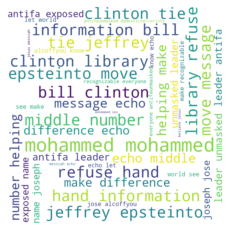

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'1 year ago'

In [ ]:
df_one_year_ago = df_tokens.loc[df['post_timestamp'] == '1 year ago']

In [ ]:
df_one_year_ago

,post_timestamp,post_tokens
4736,1 year ago,"[family, member, mine, please, never, forget, ..."
11105,1 year ago,"[family, member, mine, please, never, forget, ..."
17091,1 year ago,[]
21126,1 year ago,"[words, needed]"
29322,1 year ago,"[wisdom, living, word, nltwhat, sorrow, wise, ..."
...,...,...
291022,1 year ago,"[family, member, mine, please, never, forget, ..."
291593,1 year ago,"[patriots, country, tested, one, god, need, re..."
302302,1 year ago,[]
316192,1 year ago,"[family, member, mine, please, never, forget, ..."


In [ ]:
df_tokens_one_year_ago = df_one_year_ago.drop(columns=['post_timestamp'])

In [ ]:
df_tokens_one_year_ago

,post_tokens
4736,"[family, member, mine, please, never, forget, ..."
11105,"[family, member, mine, please, never, forget, ..."
17091,[]
21126,"[words, needed]"
29322,"[wisdom, living, word, nltwhat, sorrow, wise, ..."
...,...
291022,"[family, member, mine, please, never, forget, ..."
291593,"[patriots, country, tested, one, god, need, re..."
302302,[]
316192,"[family, member, mine, please, never, forget, ..."


In [ ]:
df_tokens_string_one_year_ago = df_tokens_one_year_ago.to_string(index = False)

In [ ]:
df_tokens_string_one_year_ago

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        post_tokens\n                                                                                                                                                                                                                                                                                                                                             [family, member, mine, please, never, forget, left, die, evil, bitch, hillary, let, softball, interview, howard, stern, fool, nasty, 

In [ ]:
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_one_year_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('evil', 32),
 ('family', 17),
 ('forget', 17),
 ('echo', 17),
 ('day', 17),
 ('member', 16),
 ('mine', 16),
 ('please', 16),
 ('never', 16),
 ('left', 16),
 ('die', 16),
 ('bitch', 16),
 ('hillary', 16),
 ('let', 16),
 ('softball', 16),
 ('interview', 16),
 ('howard', 16),
 ('stern', 16),
 ('fool', 16),
 ('nasty', 16),
 ('lying', 16),
 ('demon', 16),
 ('shit', 16),
 ('memory', 16),
 ('rest', 16),
 ('died', 16),
 ('fateful', 16),
 ('country', 13),
 ('god', 12),
 ('asian', 8),
 ('one', 7),
 ('job', 7),
 ('word', 6),
 ('needed', 6),
 ('patriot', 6),
 ('amen', 6),
 ('wisdom', 5),
 ('living', 5),
 ('nltwhat', 5),
 ('sorrow', 5),
 ('wise', 5),
 ('eye', 5),
 ('think', 5),
 ('clever', 5),
 ('good', 5),
 ('place', 5),
 ('go', 5),
 ('tested', 5),
 ('need', 5),
 ('remember', 5)]

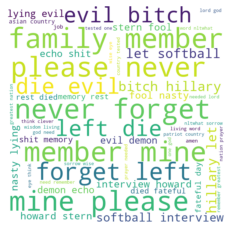

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'11 months ago'

In [ ]:
df_eleven_months_ago = df_tokens.loc[df['post_timestamp'] == '11 months ago']
df_tokens_eleven_months_ago = df_eleven_months_ago.drop(columns=['post_timestamp'])
df_tokens_string_eleven_months_ago = df_tokens_eleven_months_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_eleven_months_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('un', 3),
 ('human', 3),
 ('right', 3),
 ('ruling', 3),
 ('say', 3),
 ('climate', 3),
 ('refugee', 3),
 ('returned', 3),
 ('back', 3),
 ('home', 3),
 ('country', 3),
 ('u', 3),
 ('must', 3),
 ('open', 3),
 ('border', 3),
 ('central', 3),
 ('american', 3),
 ('via', 3),
 ('gatewaypundit', 3),
 ('post', 1),
 ('token', 1),
 ('lmao', 1)]

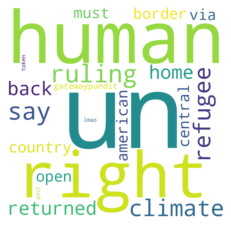

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'10 months ago'

In [ ]:
df_ten_months_ago = df_tokens.loc[df['post_timestamp'] == '10 months ago']
df_tokens_ten_months_ago = df_ten_months_ago.drop(columns=['post_timestamp'])
df_tokens_string_ten_months_ago = df_tokens_ten_months_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_ten_months_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('able', 2),
 ('post', 1),
 ('token', 1),
 ('really', 1),
 ('want', 1),
 ('allow', 1),
 ('country', 1),
 ('come', 1),
 ('illegaly', 1),
 ('change', 1),
 ('hold', 1),
 ('dear', 1),
 ('freedom', 1),
 ('europe', 1),
 ('make', 1),
 ('sure', 1),
 ('food', 1),
 ('week', 1),
 ('italy', 1),
 ('qurantines', 1),
 ('population', 1),
 ('announced', 1),
 ('today', 1),
 ('coronavirus', 1),
 ('echo', 1),
 ('join', 1),
 ('pockenet', 1),
 ('another', 1),
 ('alternative', 1),
 ('social', 1),
 ('mediasite', 1),
 ('blockckhain', 1),
 ('well', 1),
 ('every', 1),
 ('person', 1),
 ('america', 1),
 ('lock', 1),
 ('door', 1),
 ('window', 1),
 ('survive', 1),
 ('30', 1),
 ('day', 1),
 ('outside', 1),
 ('help', 1),
 ('supply', 1),
 ('also', 1),
 ('prepared', 1),
 ('defend', 1),
 ('johnnybravo', 1)]

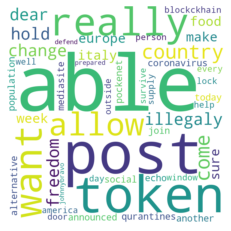

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'8 months ago'

In [ ]:
df_eight_months_ago = df_tokens.loc[df['post_timestamp'] == '8 months ago']
df_tokens_eight_months_ago = df_eight_months_ago.drop(columns=['post_timestamp'])
df_tokens_string_eight_months_ago = df_tokens_eight_months_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_eight_months_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('touted', 8),
 ('virus', 8),
 ('work', 8),
 ('danielle', 8),
 ('facebook', 8),
 ('fact', 8),
 ('human', 6),
 ('follow', 6),
 ('little', 4),
 ('shout', 4),
 ('shi', 4),
 ('zhengli', 4),
 ('given', 4),
 ('coronavirus', 4),
 ('2015', 4),
 ('published', 4),
 ('modification', 4),
 ('multiple', 4),
 ('paper', 4),
 ('least', 4),
 ('two', 4),
 ('presentation', 4),
 ('added', 4),
 ('component', 4),
 ('aid', 4),
 ('altering', 4),
 ('p', 4),
 ('protein', 4),
 ('make', 4),
 ('contagion', 4),
 ('crispr', 4),
 ('widely', 4),
 ('however', 4),
 ('seems', 4),
 ('virtually', 4),
 ('disappeared', 4),
 ('internet', 4),
 ('wait', 4),
 ('fellow', 4),
 ('wuhan', 4),
 ('lab', 4),
 ('worker', 4),
 ('anderson', 4),
 ('bill', 4),
 ('gate', 4),
 ('point', 4),
 ('woman', 4),
 ('test', 4),
 ('worth', 4),
 ('billion', 4)]

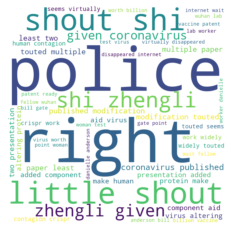

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'7 months ago'

In [ ]:
df_seven_months_ago = df_tokens.loc[df['post_timestamp'] == '7 months ago']
df_tokens_seven_months_ago = df_seven_months_ago.drop(columns=['post_timestamp'])
df_tokens_string_seven_months_ago = df_tokens_seven_months_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_seven_months_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('let', 6),
 ('un', 6),
 ('globalistsunder', 6),
 ('influence', 6),
 ('islamic', 6),
 ('satanicmoral', 6),
 ('fragmentation', 6),
 ('destruction', 6),
 ('unit', 6),
 ('new', 6),
 ('order', 6),
 ('mass', 6),
 ('post', 5),
 ('parler', 5),
 ('america', 4),
 ('sign', 4),
 ('someone', 4),
 ('yard', 4),
 ('felony', 4),
 ('obvious', 4),
 ('woman', 4),
 ('oblivious', 4),
 ('fact', 4),
 ('make', 4),
 ('famous', 4),
 ('liberal', 4),
 ('dumbass', 4),
 ('stealingisagainstthelaw', 4),
 ('echo', 4),
 ('share', 3),
 ('obamagate', 3),
 ('freedom', 2),
 ('ring', 2),
 ('sculpted', 2),
 ('bell', 2),
 ('never', 2),
 ('expected', 2),
 ('people', 2),
 ('would', 2),
 ('vandalize', 2),
 ('like', 2),
 ('f', 2),
 ('spray', 2),
 ('painted', 2),
 ('many', 2),
 ('thing', 2),
 ('go', 2),
 ('back', 2),
 ('repair', 2),
 ('every', 2)]

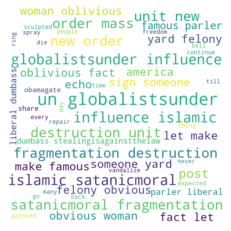

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'6 months ago'

In [ ]:
df_six_months_ago = df_tokens.loc[df['post_timestamp'] == '6 months ago']
df_tokens_six_months_ago = df_six_months_ago.drop(columns=['post_timestamp'])
df_tokens_string_six_months_ago = df_tokens_six_months_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_six_months_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Below we see 'trump' finally start to show itself as one of the top tokens with 35 mentions.

In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('echo', 48),
 ('trump', 35),
 ('biden', 33),
 ('time', 32),
 ('link', 27),
 ('let', 24),
 ('twitter', 22),
 ('president', 21),
 ('get', 21),
 ('share', 20),
 ('post', 19),
 ('sink', 19),
 ('want', 19),
 ('message', 17),
 ('would', 17),
 ('parler', 15),
 ('america', 15),
 ('video', 15),
 ('leave', 15),
 ('right', 14),
 ('keep', 14),
 ('support', 14),
 ('everyone', 14),
 ('need', 14),
 ('three', 14),
 ('stop', 13),
 ('posting', 13),
 ('screenshots', 13),
 ('give', 13),
 ('back', 11),
 ('republican', 11),
 ('day', 11),
 ('life', 11),
 ('never', 10),
 ('still', 9),
 ('please', 9),
 ('many', 9),
 ('every', 9),
 ('shame', 9),
 ('know', 9),
 ('sick', 9),
 ('patriot', 8),
 ('year', 8),
 ('going', 8),
 ('black', 8),
 ('fire', 8),
 ('official', 8),
 ('joe', 8),
 ('protest', 7),
 ('democrat', 7)]

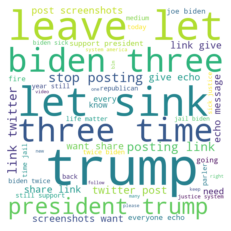

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'5 months ago'

In [ ]:
df_five_months_ago = df_tokens.loc[df['post_timestamp'] == '5 months ago']
df_tokens_five_months_ago = df_five_months_ago.drop(columns=['post_timestamp'])
df_tokens_string_five_months_ago = df_tokens_five_months_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_five_months_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('video', 757),
 ('twitter', 518),
 ('got', 377),
 ('account', 376),
 ('hashtag', 251),
 ('hard', 250),
 ('inevitable1111', 249),
 ('suspended', 249),
 ('posting', 249),
 ('nancy', 249),
 ('pelosi', 249),
 ('reached', 249),
 ('400k', 249),
 ('view', 249),
 ('since', 249),
 ('yesterday', 249),
 ('also', 249),
 ('hitting', 249),
 ('billclintonisapedo', 249),
 ('echo', 209),
 ('trump', 151),
 ('locked', 136),
 ('donald', 131),
 ('deletes', 127),
 ('wtf', 127),
 ('endlessly', 127),
 ('gijoevets', 52),
 ('coca', 34),
 ('tn2', 34),
 ('oprah', 31),
 ('involved', 31),
 ('pedophilia', 31),
 ('sex', 31),
 ('slave', 31),
 ('trafficking', 31),
 ('watch', 31),
 ('one', 27),
 ('president', 26),
 ('medium', 24),
 ('gave', 22),
 ('trump2020', 22),
 ('u', 21),
 ('patriot', 21),
 ('qanon', 21),
 ('draintheswamp', 21),
 ('man', 20),
 ('history', 20),
 ('stand', 20),
 ('maga', 20),
 ('bravest', 19)]

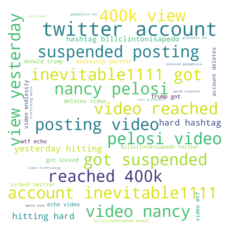

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'4 months ago'

In [ ]:
df_four_months_ago = df_tokens.loc[df['post_timestamp'] == '4 months ago']
df_tokens_four_months_ago = df_four_months_ago.drop(columns=['post_timestamp'])
df_tokens_string_four_months_ago = df_tokens_four_months_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_four_months_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('echo', 112),
 ('patriot', 58),
 ('post', 55),
 ('republic', 54),
 ('everyone', 54),
 ('would', 53),
 ('answer', 53),
 ('protect', 52),
 ('need', 52),
 ('true', 51),
 ('call', 51),
 ('arm', 51),
 ('follow', 51),
 ('network', 51),
 ('connect', 51),
 ('build', 51),
 ('americanpatriotnetwork', 51),
 ('democrat', 17),
 ('word', 16),
 ('america', 15),
 ('u', 15),
 ('coca', 15),
 ('gijoevets', 15),
 ('tn2', 15),
 ('people', 15),
 ('co45', 13),
 ('get', 12),
 ('power', 12),
 ('god', 11),
 ('trump', 11),
 ('one', 10),
 ('please', 10),
 ('fast', 10),
 ('possible', 10),
 ('brother', 9),
 ('back', 9),
 ('skripal', 9),
 ('biden', 9),
 ('never', 9),
 ('deeper', 9),
 ('happened', 8),
 ('free', 8),
 ('nothing', 8),
 ('trump2020', 8),
 ('man', 8),
 ('president', 8),
 ('black', 8),
 ('dug', 8),
 ('facebooknazis', 7),
 ('nation', 7)]

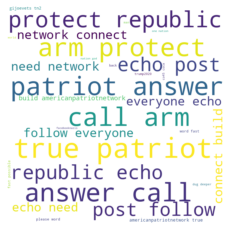

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'3 months ago'

In [ ]:
df_three_months_ago = df_tokens.loc[df['post_timestamp'] == '3 months ago']
df_tokens_three_months_ago = df_three_months_ago.drop(columns=['post_timestamp'])
df_tokens_string_three_months_ago = df_tokens_three_months_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_three_months_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('child', 88),
 ('name', 85),
 ('get', 67),
 ('pedophile', 62),
 ('george', 59),
 ('part', 59),
 ('hollywood', 58),
 ('trafficking', 58),
 ('sex', 58),
 ('spielberg', 58),
 ('lucas', 58),
 ('hidden', 56),
 ('land', 51),
 ('killary', 50),
 ('calm', 50),
 ('troubled', 50),
 ('president', 41),
 ('iknowithurts', 38),
 ('war', 36),
 ('metoomyass', 36),
 ('one', 35),
 ('full', 32),
 ('epstein', 32),
 ('flight', 32),
 ('log', 32),
 ('set', 32),
 ('release', 32),
 ('sparking', 32),
 ('panic', 32),
 ('among', 32),
 ('elite', 32),
 ('order', 32),
 ('make', 31),
 ('treason', 30),
 ('problem', 30),
 ('always', 30),
 ('way', 30),
 ('kid', 30),
 ('artimitateslife', 30),
 ('exposing', 29),
 ('number', 29),
 ('pedophilia', 29),
 ('naming', 29),
 ('victim', 29),
 ('going', 29),
 ('expose', 29),
 ('cia', 29),
 ('operation', 29),
 ('behind', 29),
 ('99', 29)]

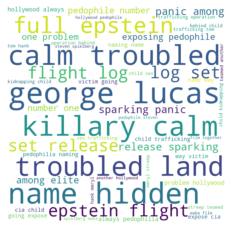

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'2 months ago'

In [ ]:
df_two_months_ago = df_tokens.loc[df['post_timestamp'] == '2 months ago']
df_tokens_two_months_ago = df_two_months_ago.drop(columns=['post_timestamp'])
df_tokens_string_two_months_ago = df_tokens_two_months_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_two_months_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('echo', 676),
 ('want', 448),
 ('arrested', 342),
 ('prosecuted', 334),
 ('biden', 207),
 ('u', 181),
 ('video', 174),
 ('joe', 155),
 ('help', 136),
 ('trump', 135),
 ('vaccine', 127),
 ('make', 125),
 ('twitter', 122),
 ('yet', 120),
 ('watch', 113),
 ('justice', 113),
 ('fraud', 113),
 ('people', 110),
 ('breaking', 110),
 ('vote', 108),
 ('getting', 106),
 ('deserves', 104),
 ('republican', 103),
 ('police', 102),
 ('voter', 102),
 ('one', 92),
 ('looking', 91),
 ('team', 87),
 ('ballot', 86),
 ('top', 86),
 ('mask', 84),
 ('reveals', 84),
 ('american', 83),
 ('hunter', 83),
 ('get', 82),
 ('chaser', 82),
 ('riggedelection', 82),
 ('precinct', 81),
 ('election', 80),
 ('around', 80),
 ('massive', 80),
 ('elect', 80),
 ('chair', 80),
 ('entire', 80),
 ('55k', 80),
 ('5k', 80),
 ('ticket', 80),
 ('country', 78),
 ('parler', 77),
 ('lockdown', 75)]

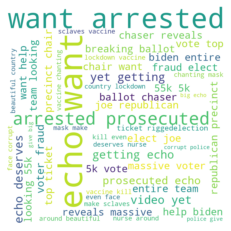

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_one_month_ago = df_tokens.loc[df['post_timestamp'] == '1 month ago']
df_tokens_one_month_ago = df_one_month_ago.drop(columns=['post_timestamp'])
df_tokens_string_one_month_ago = df_tokens_one_month_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_one_month_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Here we see 'dc' show up for the first time, I believe.

In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('echo', 2744),
 ('trump', 1706),
 ('follow', 1349),
 ('video', 1170),
 ('let', 896),
 ('show', 752),
 ('election', 725),
 ('serremmy', 713),
 ('jim', 633),
 ('people', 622),
 ('know', 588),
 ('medium', 584),
 ('see', 578),
 ('smash', 527),
 ('bring', 507),
 ('well', 504),
 ('truth', 495),
 ('sure', 463),
 ('youtube', 455),
 ('button', 454),
 ('dont', 442),
 ('get', 436),
 ('parler', 433),
 ('7mdk7', 425),
 ('jordan', 423),
 ('handle', 400),
 ('much', 399),
 ('believe', 383),
 ('biden', 372),
 ('stand', 369),
 ('said', 359),
 ('make', 331),
 ('bill', 308),
 ('u', 308),
 ('comment', 307),
 ('msm', 303),
 ('president', 294),
 ('post', 290),
 ('american', 286),
 ('dc', 283),
 ('world', 279),
 ('mstigress', 273),
 ('say', 272),
 ('name', 271),
 ('kagbx', 269),
 ('many', 268),
 ('march', 264),
 ('breaking', 262),
 ('please', 259),
 ('patriot', 258)]

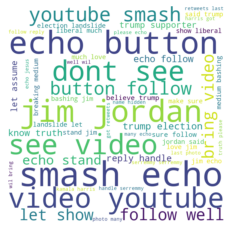

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

' 4 weeks ago'

In [ ]:
df_four_weeks_ago = df_tokens.loc[df['post_timestamp'] == '4 weeks ago']
df_tokens_four_weeks_ago = df_four_weeks_ago.drop(columns=['post_timestamp'])
df_tokens_string_four_weeks_ago = df_tokens_four_weeks_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_four_weeks_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('anti', 364),
 ('echo', 196),
 ('follow', 175),
 ('trump', 134),
 ('usa', 121),
 ('video', 121),
 ('live', 119),
 ('vaccine', 98),
 ('let', 97),
 ('covid', 96),
 ('proud', 94),
 ('boy', 93),
 ('child', 92),
 ('vaccination', 91),
 ('lockdown', 91),
 ('plandemic', 91),
 ('mask', 91),
 ('everything', 91),
 ('pro', 91),
 ('family', 91),
 ('safety', 91),
 ('citisens', 91),
 ('honour', 91),
 ('huge', 91),
 ('join', 91),
 ('bring', 91),
 ('president', 79),
 ('know', 77),
 ('lot', 66),
 ('wanted', 66),
 ('serremmy', 63),
 ('ride', 49),
 ('thing', 39),
 ('one', 38),
 ('help', 37),
 ('keep', 37),
 ('big', 34),
 ('7mdk7', 34),
 ('mstigress', 34),
 ('freedom', 32),
 ('national', 31),
 ('two', 31),
 ('dc', 31),
 ('republic', 31),
 ('moment', 30),
 ('way', 30),
 ('anthem', 29),
 ('smash', 29),
 ('marine', 29),
 ('trying', 29)]

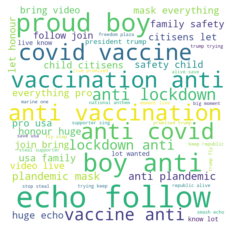

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_three_weeks_ago = df_tokens.loc[df['post_timestamp'] == '3 weeks ago']
df_tokens_three_weeks_ago = df_three_weeks_ago.drop(columns=['post_timestamp'])
df_tokens_string_three_weeks_ago = df_tokens_three_weeks_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_three_weeks_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('u', 1739),
 ('obama', 1246),
 ('trump', 1216),
 ('declassified', 1209),
 ('back', 919),
 ('echo', 918),
 ('patriot', 894),
 ('usa', 850),
 ('follow', 830),
 ('work', 676),
 ('get', 623),
 ('god', 609),
 ('fight', 606),
 ('freedom', 577),
 ('year', 576),
 ('thing', 575),
 ('stand', 575),
 ('life', 569),
 ('report', 565),
 ('much', 565),
 ('see', 565),
 ('show', 562),
 ('warned', 560),
 ('tragedy', 559),
 ('eye', 558),
 ('around', 558),
 ('evil', 557),
 ('rush', 555),
 ('agenda', 555),
 ('longer', 555),
 ('willing', 555),
 ('decade', 553),
 ('opening', 553),
 ('educating', 553),
 ('leftism', 553),
 ('destroyed', 553),
 ('successfully', 553),
 ('fraud', 542),
 ('biden', 492),
 ('dominion', 483),
 ('stopthesteal', 478),
 ('maga', 475),
 ('fightback', 468),
 ('voterfraud', 461),
 ('maga2020', 461),
 ('assange', 461),
 ('georgia', 454),
 ('kag', 452),
 ('texas', 451),
 ('americafirst', 448)]

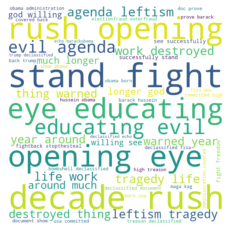

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'2 weeks ago'

In [ ]:
df_two_weeks_ago = df_tokens.loc[df['post_timestamp'] == '2 weeks ago']
df_tokens_two_weeks_ago = df_two_weeks_ago.drop(columns=['post_timestamp'])
df_tokens_string_two_weeks_ago = df_tokens_two_weeks_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_two_weeks_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('go', 1025),
 ('echo', 735),
 ('duck', 598),
 ('trump', 468),
 ('follow', 442),
 ('yes', 420),
 ('state', 384),
 ('president', 359),
 ('senate', 354),
 ('find', 342),
 ('name', 337),
 ('house', 331),
 ('politician', 328),
 ('fucking', 325),
 ('serremmy', 323),
 ('stand', 323),
 ('ca', 322),
 ('back', 317),
 ('hidden', 309),
 ('article', 307),
 ('google', 307),
 ('oh', 305),
 ('explains', 304),
 ('found', 303),
 ('removing', 299),
 ('people', 291),
 ('get', 253),
 ('agree', 208),
 ('7mdk7', 199),
 ('need', 196),
 ('election', 184),
 ('let', 182),
 ('u', 173),
 ('parler', 170),
 ('mstigress', 169),
 ('gijoevets', 165),
 ('god', 164),
 ('ride', 163),
 ('america', 161),
 ('great', 160),
 ('follows', 153),
 ('lakemonstercl', 153),
 ('patriot', 147),
 ('one', 140),
 ('take', 138),
 ('bless', 138),
 ('doingright1', 137),
 ('want', 136),
 ('gijoevets2', 132),
 ('ohiw', 132)]

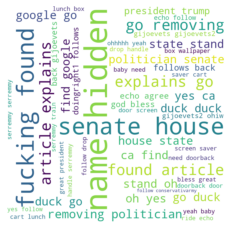

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'1 week ago'

In [ ]:
df_one_week_ago = df_tokens.loc[df['post_timestamp'] == '1 week ago']
df_tokens_one_week_ago = df_one_week_ago.drop(columns=['post_timestamp'])
df_tokens_string_one_week_ago = df_tokens_one_week_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_one_week_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('echo', 2434),
 ('trump', 1958),
 ('follow', 1255),
 ('get', 1018),
 ('president', 1011),
 ('like', 870),
 ('name', 859),
 ('hidden', 784),
 ('election', 754),
 ('agree', 740),
 ('patriot', 715),
 ('know', 715),
 ('voted', 685),
 ('china', 685),
 ('republican', 683),
 ('democrat', 681),
 ('biden', 678),
 ('blame', 656),
 ('people', 624),
 ('win', 594),
 ('one', 579),
 ('please', 530),
 ('stopthesteal', 528),
 ('go', 527),
 ('voter', 510),
 ('serremmy', 508),
 ('maga', 490),
 ('click', 482),
 ('trumptrain', 482),
 ('american', 461),
 ('america', 452),
 ('official', 443),
 ('7mdk7', 422),
 ('gop', 414),
 ('would', 406),
 ('u', 401),
 ('lakemonstercl', 393),
 ('fightback', 390),
 ('look', 386),
 ('time', 368),
 ('back', 368),
 ('wwg1wga', 365),
 ('state', 361),
 ('selling', 352),
 ('new', 351),
 ('want', 345),
 ('mstigress', 335),
 ('americafirst', 334),
 ('charge', 333),
 ('fraud', 332)]

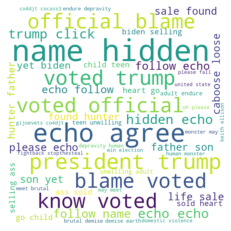

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'6 days ago'

In [ ]:
df_six_days_ago = df_tokens.loc[df['post_timestamp'] == '6 days ago']
df_tokens_six_days_ago = df_six_days_ago.drop(columns=['post_timestamp'])
df_tokens_string_six_days_ago = df_tokens_six_days_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_six_days_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Here we see 'dc' with 916 at the top 3.  'trump' is top word.

In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('trump', 1377),
 ('echo', 922),
 ('dc', 916),
 ('follow', 890),
 ('name', 789),
 ('selling', 775),
 ('hidden', 705),
 ('police', 686),
 ('u', 675),
 ('president', 651),
 ('election', 640),
 ('patriot', 604),
 ('people', 601),
 ('country', 558),
 ('antifa', 474),
 ('american', 468),
 ('state', 461),
 ('stopthesteal', 448),
 ('need', 448),
 ('right', 398),
 ('fraud', 385),
 ('america', 382),
 ('let', 374),
 ('many', 373),
 ('know', 364),
 ('parler', 358),
 ('fight', 350),
 ('serremmy', 349),
 ('time', 349),
 ('stand', 344),
 ('democrat', 339),
 ('get', 338),
 ('free', 336),
 ('georgia', 334),
 ('senator', 331),
 ('maga', 316),
 ('republican', 315),
 ('video', 307),
 ('2020', 305),
 ('business', 295),
 ('back', 287),
 ('one', 287),
 ('must', 281),
 ('support', 280),
 ('biden', 280),
 ('rule', 279),
 ('think', 274),
 ('proud', 271),
 ('case', 266),
 ('never', 266)]

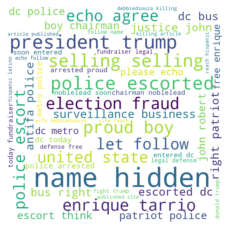

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'5 days ago'

'5 days ago' took 3 minutes to run.  The most it previously took for other time stamps was 10 seconds.

In [ ]:
df_five_days_ago = df_tokens.loc[df['post_timestamp'] == '5 days ago']
df_tokens_five_days_ago = df_five_days_ago.drop(columns=['post_timestamp'])
df_tokens_string_five_days_ago = df_tokens_five_days_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_five_days_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('trump', 41074),
 ('dc', 24618),
 ('patriot', 22555),
 ('vote', 20883),
 ('election', 20170),
 ('president', 19491),
 ('georgia', 15402),
 ('republican', 14620),
 ('follow', 13952),
 ('echo', 12985),
 ('state', 12657),
 ('watch', 11398),
 ('tomorrow', 10978),
 ('democrat', 10181),
 ('u', 10152),
 ('people', 9655),
 ('see', 9333),
 ('let', 9198),
 ('biden', 9025),
 ('supporter', 8693),
 ('news', 8211),
 ('like', 8049),
 ('video', 7742),
 ('stopthesteal', 7560),
 ('name', 7538),
 ('pennsylvania', 7322),
 ('senate', 7314),
 ('maga', 7166),
 ('county', 7145),
 ('one', 7092),
 ('american', 7082),
 ('right', 7041),
 ('going', 7033),
 ('antifa', 6943),
 ('time', 6816),
 ('ballot', 6715),
 ('go', 6474),
 ('romney', 6436),
 ('fraud', 6404),
 ('never', 6197),
 ('get', 6168),
 ('senator', 6137),
 ('know', 6114),
 ('stop', 6008),
 ('say', 5979),
 ('america', 5948),
 ('breaking', 5946),
 ('hidden', 5935),
 ('god', 5648),
 ('washington', 5644)]

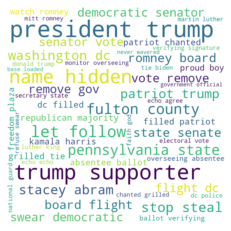

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'4 days ago'

In [ ]:
df_four_days_ago = df_tokens.loc[df['post_timestamp'] == '4 days ago']
df_tokens_four_days_ago = df_four_days_ago.drop(columns=['post_timestamp'])
df_tokens_string_four_days_ago = df_tokens_four_days_ago.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_four_days_ago))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('trump', 9062),
 ('vote', 8077),
 ('election', 7102),
 ('people', 5421),
 ('georgia', 5136),
 ('dc', 4838),
 ('u', 4525),
 ('president', 4197),
 ('today', 4042),
 ('time', 4013),
 ('patriot', 3786),
 ('democrat', 3232),
 ('got', 3212),
 ('fraud', 2960),
 ('biden', 2874),
 ('state', 2806),
 ('warnock', 2784),
 ('county', 2763),
 ('penny', 2639),
 ('right', 2601),
 ('live', 2541),
 ('know', 2521),
 ('republican', 2484),
 ('one', 2459),
 ('must', 2336),
 ('like', 2284),
 ('watch', 2263),
 ('echo', 2238),
 ('america', 2185),
 ('video', 2173),
 ('senate', 2155),
 ('perdue', 2149),
 ('voter', 2147),
 ('see', 2114),
 ('go', 2111),
 ('follow', 2094),
 ('country', 2055),
 ('news', 2054),
 ('day', 1977),
 ('god', 1970),
 ('police', 1957),
 ('get', 1912),
 ('going', 1900),
 ('stopthesteal', 1879),
 ('ballot', 1822),
 ('american', 1792),
 ('fulton', 1784),
 ('supporter', 1691),
 ('year', 1655),
 ('dekalb', 1650)]

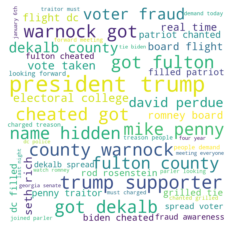

In [ ]:
#ii)  Stopwords removal and wordcloud for top 50 words
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(cleaned_lemmatized_tokens)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_nan = df_tokens.loc[df['post_timestamp'] == 'nan']
df_tokens_nan = df_nan.drop(columns=['post_timestamp'])
df_tokens_string_nan = df_tokens_nan.to_string(index = False)
#Text cleaning, tokenization, lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                             for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', df_tokens_string_nan))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'nan'

In [ ]:
Counter(cleaned_lemmatized_tokens).most_common(50)

[('empty', 1),
 ('dataframe', 1),
 ('column', 1),
 ('post', 1),
 ('token', 1),
 ('index', 1)]

In [ ]:
df_nan

,post_timestamp,post_tokens
